In [32]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud

In [3]:
# lets explore movies.csv
data = pd.read_csv('movies_20m.csv')
data.shape

(27278, 3)

In [4]:
data.head() #displays first 5 entries 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#number of unique movies
movies = data['movieId'].unique().tolist()
len(movies)

27278

In [6]:
# lets explore ratings.CSV
ratings_data = pd.read_csv('ratings_20m.csv',sep=',')
ratings_data.shape

(20000263, 4)

In [7]:
#summary of ratings.csv
ratings_data.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [8]:
#minimum rating given to a movie
ratings_data['rating'].min() 

0.5

In [9]:
#maximum rating given to a movie
ratings_data['rating'].max()

5.0

In [10]:
#is any row null
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [11]:
#is any row null there
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [54]:
# filtering to get the list of crime movies
drama_movies = data['genres'].str.contains('Drama')
data[drama_movies].head()
#drama_movies

,movieId,title,genres,year
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
10,11,"American President, The (1995)",Comedy|Drama|Romance,1995
13,14,Nixon (1995),Drama,1995
15,16,Casino (1995),Crime|Drama,1995
16,17,Sense and Sensibility (1995),Drama|Romance,1995


In [43]:
#total number of drama movies
data[drama_movies].shape

(13344, 4)

In [19]:
#displays first 5 data from a dataframe
#here rating.csv has 4 columns
ratings_data.head() 

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [58]:
#merging two dataframes "movies.csv" and "ratings.csv"
movie_data_ratings_data = data.merge(ratings_data,on = 'movieId',how = 'inner')
movie_data_ratings_data

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,11,4.5,1230858821
...,...,...,...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),Comedy,2007,79570,4.0,1427743979
20000259,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,79570,4.0,1427744888
20000260,131258,The Pirates (2014),Adventure,2014,28906,2.5,1427745392
20000261,131260,Rentun Ruusu (2001),(no genres listed),2001,65409,3.0,1427745466


In [21]:
#displays high rated movies
high_rated = movie_data_ratings_data['rating'] > 4.0
movie_data_ratings_data[high_rated].head(10)

,movieId,title,genres,userId,rating,timestamp
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1225311239
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0,855176628
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0,846509445
15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,39,5.0,859325696
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0,1144058408
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59,4.5,1380400521
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,82,5.0,1317331523
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84,5.0,832543433


In [50]:
movie_data_ratings_data.tail()

,movieId,title,genres,userId,rating,timestamp
20000258,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0,1427743979
20000259,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570,4.0,1427744888
20000260,131258,The Pirates (2014),Adventure,28906,2.5,1427745392
20000261,131260,Rentun Ruusu (2001),(no genres listed),65409,3.0,1427745466
20000262,131262,Innocence (2014),Adventure|Fantasy|Horror,133047,4.0,1427747966


In [22]:
# displays low rated movies
low_rated = movie_data_ratings_data['rating'] < 4.0
movie_data_ratings_data[low_rated].head()

,movieId,title,genres,userId,rating,timestamp
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0,990969772
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,3.0,994638157
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0,1424733487
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0,1239940397
23,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,80,3.0,858458513


In [23]:
#total number of unique movie genre
unique_genre=data['genres'].unique().tolist()
len(unique_genre)

1342

In [59]:
#top 25 most rated movies
most_rated = movie_data_ratings_data.groupby('title').size().sort_values(ascending=False)[:5]
most_rated.head(5)

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
dtype: int64

In [61]:
avg_rating = movie_data_ratings_data.groupby('rating').size().sort_values(ascending=False)
avg_rating

rating
4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
dtype: int64

In [25]:
#slicing out columns to display only title and genres columns from movies.csv
data[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [26]:
# here we extract year from title
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [27]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [28]:
#here we  make census of the genres:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [29]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

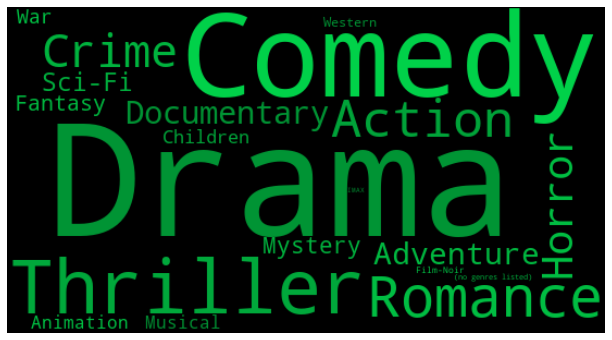

In [33]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

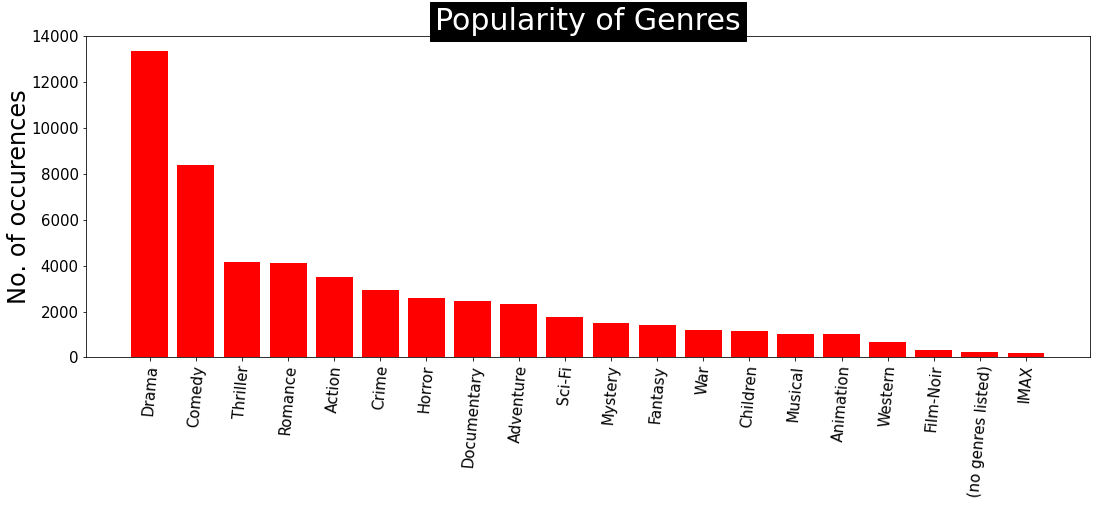

In [34]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()